In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn import manifold
%matplotlib inline

In [59]:
mnist = load_digits()
X, Y = mnist.data, mnist.target

In [60]:
df = pd.read_csv('datasets/winequality-red.csv')
quality_mapping = {
 3: 0,
 4: 0,
 5: 0,
 6: 1,
 7: 1,
 8: 1
}

df["quality"] = df.quality.replace(quality_mapping)
x, y = df.drop(['quality'], axis=1), df['quality'] 

# model building and evaluation 

In [61]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(x, y)
train_df = pd.concat([X_train, y_train], axis=1)
train_df.to_csv('datasets/train.csv', index=False) 
test_df = pd.concat([X_test, y_test], axis=1)
test_df.to_csv('datasets/test.csv', index=False)

In [63]:
# max_depth = 3 case 

clf = DecisionTreeClassifier(max_depth=3) 
clf.fit(X_train, y_train)

train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

train_accuracy = accuracy_score(
 y_train, train_predictions
)

test_accuracy = accuracy_score(
 y_test, test_predictions
)

print(f"train_accuracy -- {train_accuracy}")
print(f'test_accuracy  -- {test_accuracy}')

train_accuracy -- 0.6997497914929107
test_accuracy  -- 0.7025


In [64]:
# max_depth = 7 case 

clf = DecisionTreeClassifier(max_depth=7) 
clf.fit(X_train, y_train)

train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

train_accuracy = accuracy_score(
 y_train, train_predictions
)

test_accuracy = accuracy_score(
 y_test, test_predictions
)

print(f"train_accuracy -- {train_accuracy}")
print(f'test_accuracy  -- {test_accuracy}')

train_accuracy -- 0.8482068390325271
test_accuracy  -- 0.74


In [65]:
train_acc = [0.5] 
test_acc = [0.5] 
for ix in range(1,25):
    clf = DecisionTreeClassifier(max_depth=ix) 
    clf.fit(X_train, y_train)

    train_predictions = clf.predict(X_train)
    test_predictions = clf.predict(X_test)

    train_accuracy = accuracy_score(
    y_train, train_predictions
    )

    train_acc.append(train_accuracy)

    test_accuracy = accuracy_score(
    y_test, test_predictions
    )

    test_acc.append(test_accuracy)

Text(0, 0.5, 'accuracy')

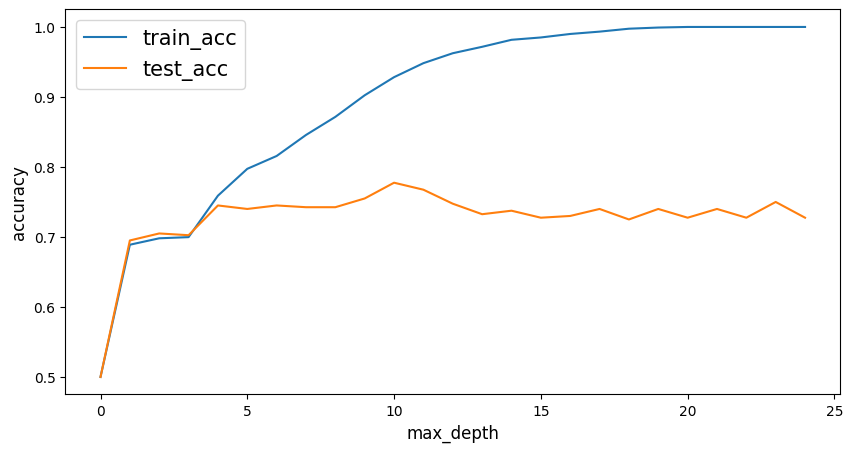

In [66]:
plt.figure(figsize=(10,5))
plt.plot(train_acc, label='train_acc')
plt.plot(test_acc, label='test_acc')
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=12)
plt.ylabel("accuracy", size=12)

# cross validation 

### k-fold : split data into k equal parts 

In [69]:
import pandas as pd
from sklearn.model_selection import KFold

<Axes: xlabel='quality', ylabel='count'>

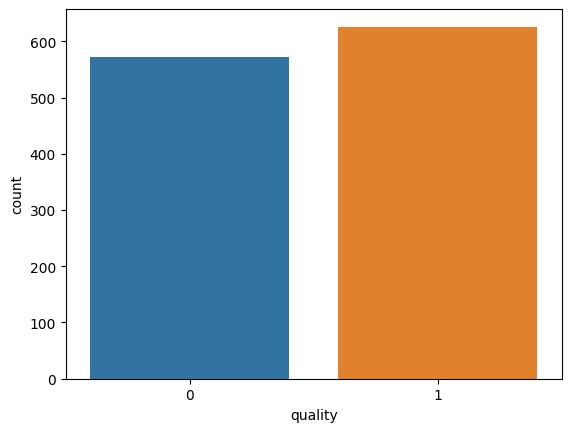

In [72]:
df = pd.read_csv('datasets/train.csv')
df['kfold'] = -1
df = df.sample(frac=1).reset_index(drop=True)
kf = KFold(n_splits=5)
# fill the new kfold column
for fold, (trn_, val_) in enumerate(kf.split(X=df)):
    df.loc[val_, 'kfold'] = fold

df.to_csv("datasets/train_folds.csv", index=False)
sns.countplot(data=df, x='quality')

### Stratified k-fold : split data into k equal parts with giving weights to the imbalance

In [73]:
from sklearn.model_selection import StratifiedKFold

In [74]:
kf = StratifiedKFold(n_splits=5)
y = df['quality'].values
# fill the new kfold column
for fold, (trn_, val_) in enumerate(kf.split(X=df, y=y)):
    df.loc[val_, 'kfold'] = fold

df.to_csv("datasets/strata_train.csv", index=False)